In [1]:
import pandas as pd 
df=pd.read_csv("zomato_new.csv")

In [2]:
df.dropna(inplace=True,axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51717 non-null  float64
 1   online_order                 51717 non-null  int64  
 2   book_table                   51717 non-null  int64  
 3   rate                         51717 non-null  float64
 4   votes                        51717 non-null  int64  
 5   location                     51717 non-null  float64
 6   rest_type                    51717 non-null  float64
 7   cuisines                     51717 non-null  float64
 8   approx_cost(for two people)  51717 non-null  float64
 9   listed_in(type)              51717 non-null  int64  
 10  listed_in(city)              51717 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 4.3 MB


In [3]:
df.drop(["book_table",'listed_in(city)'],axis=1,inplace=True)

In [4]:
X=df.drop("online_order",axis=1)
y=df["online_order"]

In [5]:
# select numerical variables
num_vars = X.select_dtypes(include=['float', 'int']).columns
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler,PowerTransformer,RobustScaler,StandardScaler

# perform min-max scaling
scaler = StandardScaler()
X[num_vars] = scaler.fit_transform(X[num_vars])

Accuracy of KNeighborsClassifier: 0.79
Confusion Matrix of KNeighborsClassifier: 
 [[3153 1111]
 [1013 5067]]
Classification Report of KNeighborsClassifier: 
               precision    recall  f1-score   support

           0       0.76      0.74      0.75      4264
           1       0.82      0.83      0.83      6080

    accuracy                           0.79     10344
   macro avg       0.79      0.79      0.79     10344
weighted avg       0.79      0.79      0.79     10344

Accuracy of LogisticRegression: 0.64
Confusion Matrix of LogisticRegression: 
 [[1639 2625]
 [1123 4957]]
Classification Report of LogisticRegression: 
               precision    recall  f1-score   support

           0       0.59      0.38      0.47      4264
           1       0.65      0.82      0.73      6080

    accuracy                           0.64     10344
   macro avg       0.62      0.60      0.60     10344
weighted avg       0.63      0.64      0.62     10344

Accuracy of AdaBoostClassifier: 0.

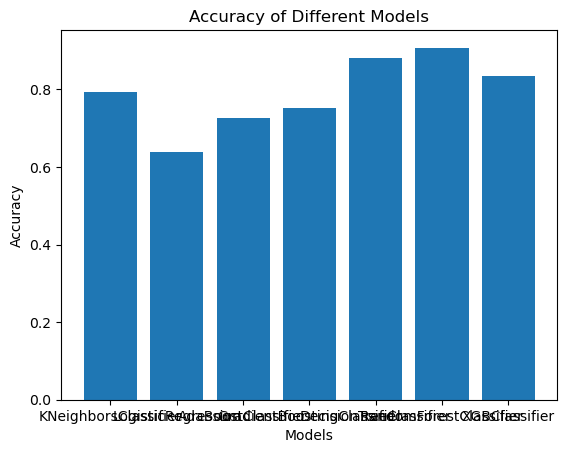

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a list of models to train
models = [KNeighborsClassifier(), 
          LogisticRegression(),
          AdaBoostClassifier(),
          GradientBoostingClassifier(),
          DecisionTreeClassifier(), 
          RandomForestClassifier(), 
          XGBClassifier()]

# Train each model and store the accuracy results
results = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append(accuracy)
    print(f"Accuracy of {model.__class__.__name__}: {accuracy:.2f}")
    print(f"Confusion Matrix of {model.__class__.__name__}: \n {confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report of {model.__class__.__name__}: \n {classification_report(y_test, y_pred)}")

# Plot the results
plt.bar(x=range(len(models)), height=results)
plt.xticks(range(len(models)), [model.__class__.__name__ for model in models])
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.title("Accuracy of Different Models")
plt.show()


Feature ranking:
1. feature 2 (0.261890)
2. feature 3 (0.194831)
3. feature 1 (0.116324)
4. feature 0 (0.100375)
5. feature 6 (0.099082)
6. feature 7 (0.088480)
7. feature 4 (0.070273)
8. feature 5 (0.068744)


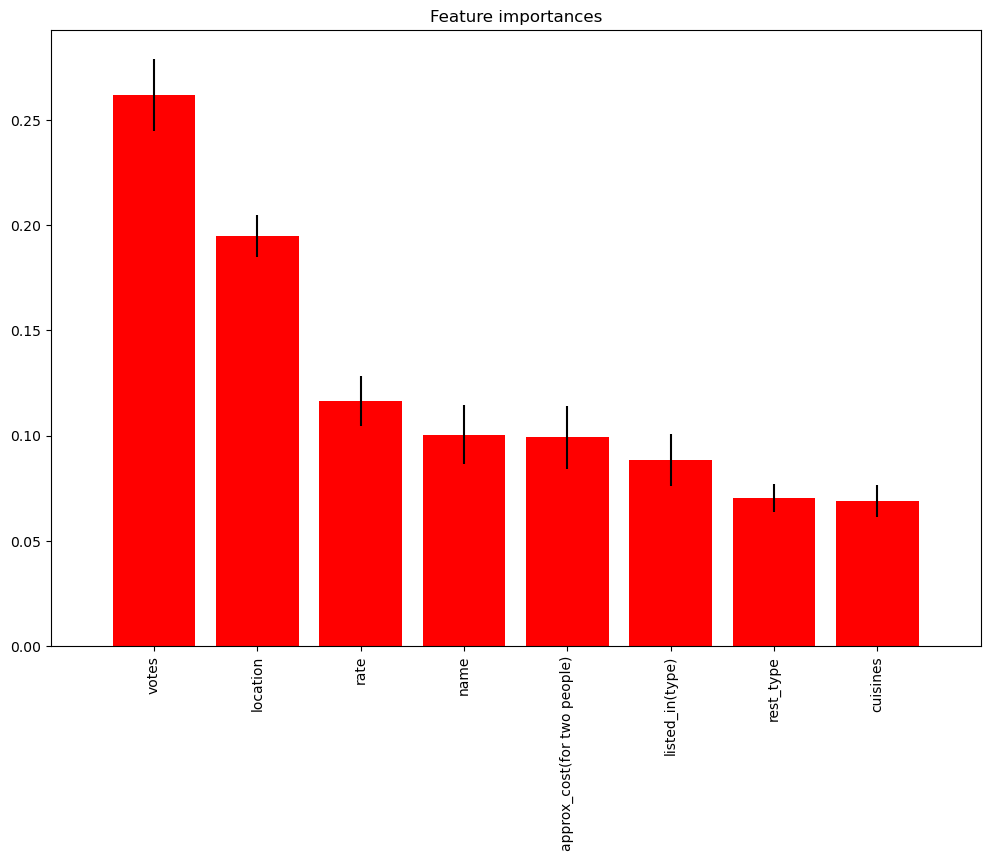

In [7]:
import matplotlib.pyplot as plt 
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)

# Plotting feature importance
importances = classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model and parameter grid
rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20, 30],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
    #'max_features': ['auto', 'sqrt', 'log2', None]
}

# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)


KeyboardInterrupt: 

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np



# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier()

# Perform cross validation with 5 folds
cv_scores = cross_val_score(rf_clf, X, y, cv=5,scoring="accuracy")

# Print the mean and standard deviation of the cross-validation scores
print("Mean CV score:", np.mean(cv_scores))
print("Standard deviation of CV scores:", np.std(cv_scores))


Mean CV score: 0.8901524873931645
Standard deviation of CV scores: 0.025897088336943964
